In [1222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1223]:
new_df= pd.read_csv(r"df_clean_after_removing_outliers.csv")

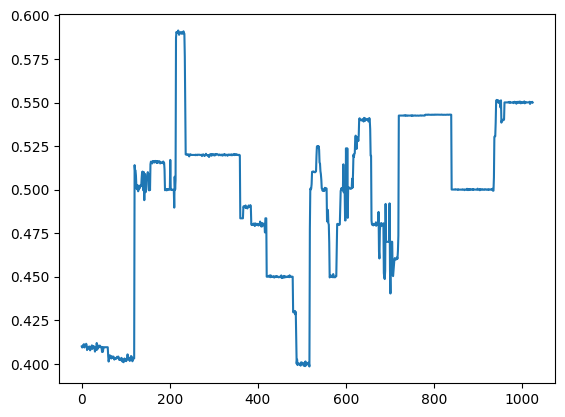

In [1224]:
plt.plot(new_df['c39'])

# c161

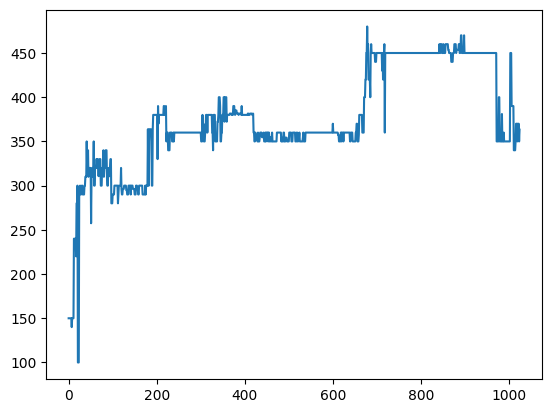

In [1225]:
plt.plot(new_df['c161'])

In [1226]:
# Calculate the IQR for 'c161' column
q1 = new_df['c161'].quantile(0.25)
q3 = new_df['c161'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 -  1.0* iqr
upper_bound = q3 + 1.0* iqr

# Replace outliers with the mean of the remaining data in 'c161' column
new_df['c161'] = new_df['c161'].apply(lambda x: new_df['c161'][(new_df['c161'] >= lower_bound) & (new_df['c161'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


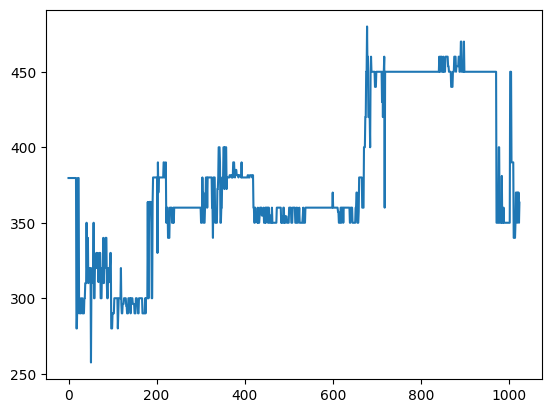

In [1227]:
plt.plot(new_df['c161'])

In [1228]:
# # Define the column names you want to work with
# # Get the column names of your cleaned DataFrame
# column_names = df_clean.columns.tolist()

# # Exclude 'c1' from the list of column names if it's present
# if 'c1' in column_names:
#     column_names.remove('c1')



# Create an empty DataFrame to store the results
# new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 25

# ... (previous code remains unchanged)


new_column_data = []  
for i in range(0, len(new_df['c161']), step_size):
    # Get the current 50 data points
    data_subset = new_df['c161'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5 * iqr
    upper_bound = q3 + 0.5 * iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
# # Convert the new_column_data list to a Series
# new_column_series = pd.Series(new_column_data, name=column_name)
new_df['c161_1'] = new_column_data
    
# # Concatenate the new column to the new_df DataFrame
# new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment

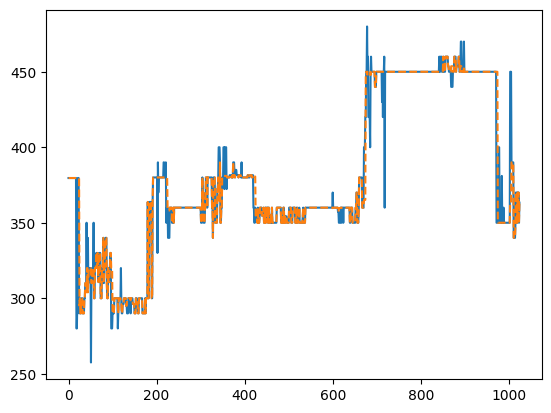

In [1229]:
plt.plot(new_df['c161'] )
plt.plot(new_df['c161_1'],linestyle='--')

# normalized data


In [1230]:
# Log transformation (example for skewed column 'c51')
# new_df['c51'] = np.log1p(new_df['c51'])
column_names = new_df.columns.tolist()

# Exclude 'c1' from the list of column names if it's present
if 'c1' in column_names:
    column_names.remove('c1')

# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_df[column_names])

# Create a Pandas DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# # Now, 'normalized_df' contains the normalized data in Pandas DataFrame format


In [1231]:
normalized_df


,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,...,c232,c233,c234,c235,c236,c237,c238,c239,c241,c161_1
0,0.0,0.821048,0.774432,0.797698,0.425286,0.340017,0.813924,0.474407,0.800336,0.810486,...,0.623784,0.567504,0.561245,0.103452,0.073821,0.284808,0.642956,0.638040,0.417964,0.527230
1,0.0,0.821048,0.774432,0.854546,0.226782,0.334315,0.813924,0.515985,0.743410,0.810486,...,0.623784,0.567504,0.561245,0.132978,0.068064,0.287033,0.642956,0.647809,0.509822,0.527230
2,0.0,0.821048,0.774432,0.715114,0.230805,0.133872,0.813924,0.349455,0.801265,0.810486,...,0.623784,0.567504,0.561245,0.159175,0.025535,0.254054,0.642956,0.654062,0.241267,0.527230
3,0.0,0.479084,0.774432,0.728629,0.244958,0.332080,0.813924,0.427216,0.610777,0.810486,...,0.623784,0.567504,0.561245,0.105314,0.082313,0.184203,0.476472,0.671587,0.243063,0.527230
4,0.0,0.658670,0.482840,0.770758,0.230250,0.325546,0.813924,0.429969,0.700920,0.621691,...,0.623784,0.567504,0.561245,0.092615,0.086531,0.239826,0.639754,0.697700,0.256726,0.527230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,0.523983,0.582865,0.429645,0.877767,0.208831,0.535529,0.708635,0.356077,0.746407,...,0.905271,0.943935,0.746860,0.680107,0.057830,0.575891,0.422319,0.501195,0.000322,0.470588
1021,0.0,0.545323,0.614187,0.378445,0.909159,0.202092,0.535786,0.673017,0.355220,0.731298,...,0.926593,0.959402,0.731161,0.697455,0.061573,0.553137,0.444589,0.464444,0.053353,0.431373
1022,0.0,0.576429,0.660426,0.414860,0.955935,0.207062,0.528698,0.719753,0.357403,0.722159,...,0.932485,0.960684,0.702866,0.685491,0.058455,0.533175,0.403780,0.493901,0.089512,0.470588
1023,0.0,0.580972,0.666392,0.520138,0.960781,0.201865,0.531449,0.719922,0.348260,0.705025,...,0.960180,0.991965,0.718645,0.657375,0.056385,0.523639,0.404087,0.504270,0.116150,0.352941


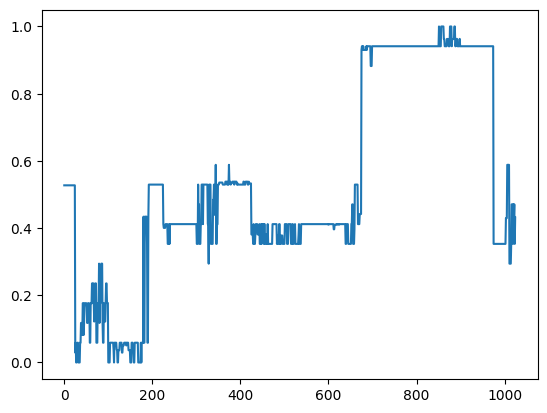

In [1232]:
plt.plot(normalized_df['c161_1'])

In [1233]:
for i in range(0,50):
    if(normalized_df['c161_1'][i]>0.4):
        normalized_df['c161_1'][i]=0.2

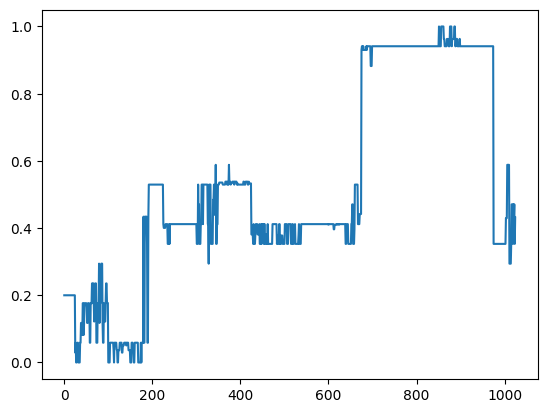

In [1234]:
plt.plot(normalized_df['c161_1'])

In [1235]:
# # # Define the column names you want to work with
# # # Get the column names of your cleaned DataFrame
# # column_names = df_clean.columns.tolist()

# # # Exclude 'c1' from the list of column names if it's present
# # if 'c1' in column_names:
# #     column_names.remove('c1')



# # Create an empty DataFrame to store the results
# # new_df = pd.DataFrame()

# # Define the step size (50 data points at a time)
# step_size = 100

# # ... (previous code remains unchanged)


# new_column_data = []  
# for i in range(0, len(new_df['c161']), step_size):
#     # Get the current 50 data points
#     data_subset = new_df['c161'].iloc[i:i+step_size].copy()
        
#     # Calculate the IQR for the current subset
#     q1 = np.percentile(data_subset, 25)
#     q3 = np.percentile(data_subset, 75)
#     iqr = q3 - q1
        
#     # Calculate the lower and upper bounds for outliers
#     lower_bound = q1 - 0.5 * iqr
#     upper_bound = q3 + 0.5 * iqr
#     # Calculate mean for non-outliers within the subset
#     subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
#     # Replace outliers with the mean of the 50 data points
#     data_subset[data_subset < lower_bound] = subset_mean
#     data_subset[data_subset > upper_bound] = subset_mean
    
#     # Explicitly cast subset_mean to int before appending to the new_column_data list
#     subset_mean = int(subset_mean)
        
#     # Append the modified data to the new_column_data list
#     new_column_data.extend(data_subset)
    
# # # Convert the new_column_data list to a Series
# # new_column_series = pd.Series(new_column_data, name=column_name)
# new_df['c161_1'] = new_column_data
    
# # # Concatenate the new column to the new_df DataFrame
# # new_df = pd.concat([new_df, new_column_series], axis=1)

# # Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


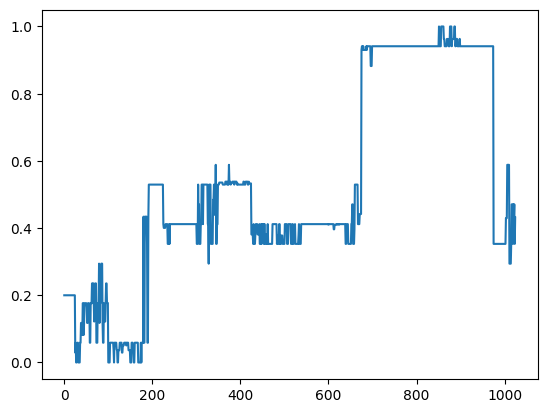

In [1236]:
plt.plot(normalized_df['c161_1'])

# c158


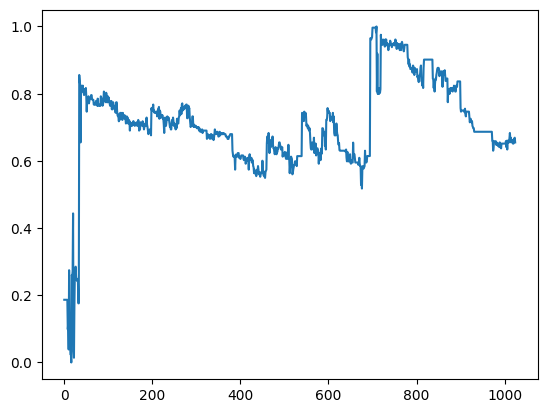

In [1237]:
plt.plot(normalized_df['c158'])

In [1238]:
# # Define the column names you want to work with
# # Get the column names of your cleaned DataFrame
# column_names = df_clean.columns.tolist()

# # Exclude 'c1' from the list of column names if it's present
# if 'c1' in column_names:
#     column_names.remove('c1')



# Create an empty DataFrame to store the results
# new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 50

# ... (previous code remains unchanged)


new_column_data = []  
for i in range(0, len(normalized_df['c158']), step_size):
    # Get the current 50 data points
    data_subset = normalized_df['c158'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5 * iqr
    upper_bound = q3 + 0.5 * iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
# # Convert the new_column_data list to a Series
# new_column_series = pd.Series(new_column_data, name=column_name)
normalized_df['c158_1'] = new_column_data
    
# # Concatenate the new column to the new_df DataFrame
# new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


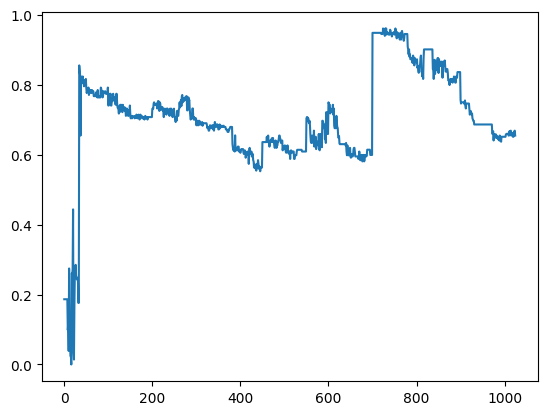

In [1239]:
plt.plot(normalized_df['c158_1'])

In [1240]:
# Calculate the IQR for 'c161' column
q1 = normalized_df['c158_1'].quantile(0.25)
q3 = normalized_df['c158_1'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 -  1.4* iqr
upper_bound = q3 + 1.4* iqr

# Replace outliers with the mean of the remaining data in 'c161' column
normalized_df['c158_1'] = normalized_df['c158_1'].apply(lambda x: normalized_df['c158_1'][(normalized_df['c158_1'] >= lower_bound) & (normalized_df['c158_1'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


wirte why did we take 1.4 as threshold above


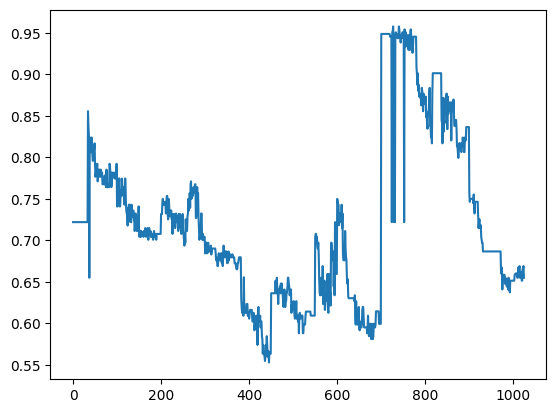

In [1241]:
plt.plot(normalized_df['c158_1'])

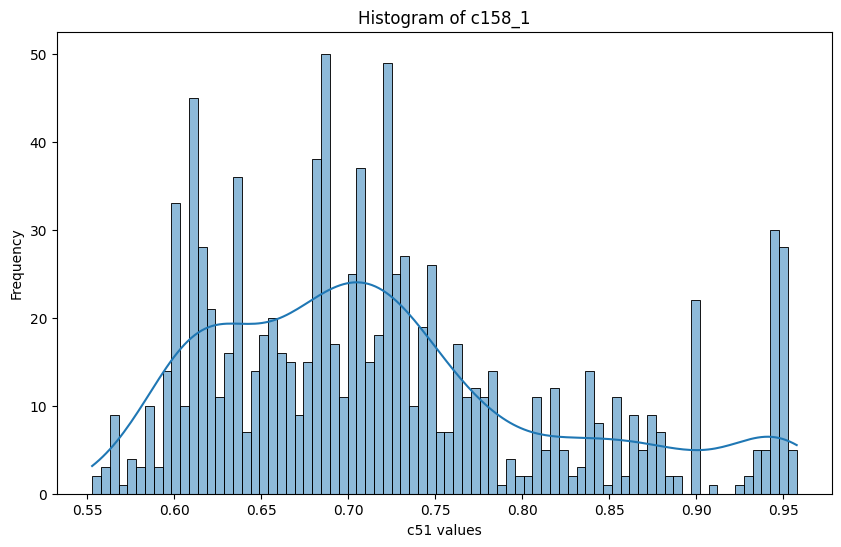

In [1242]:
column='c158_1'
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df[column], bins=80, kde=True)
plt.title(f'Histogram of {column}')
plt.xlabel('c51 values')
plt.ylabel('Frequency')
plt.show()

In [1243]:
for i in range(100):
    if(normalized_df['c158_1'][i]<0.7):
        normalized_df['c158_1'][i]=0.7
    

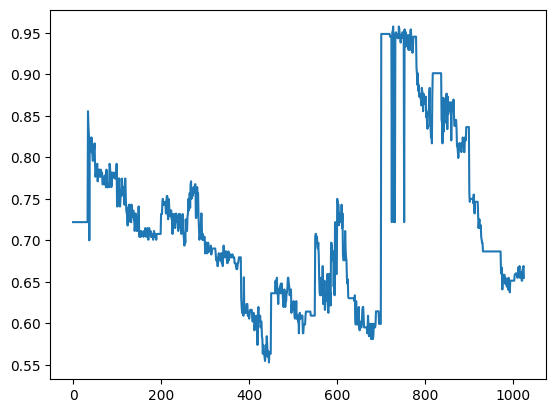

In [1244]:
plt.plot(normalized_df['c158_1'])

# c30

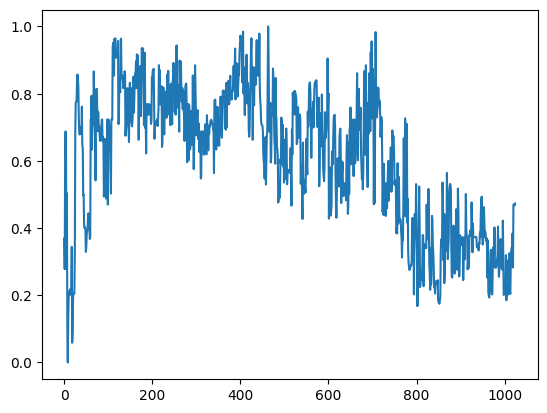

In [1245]:
plt.plot(normalized_df['c30'])

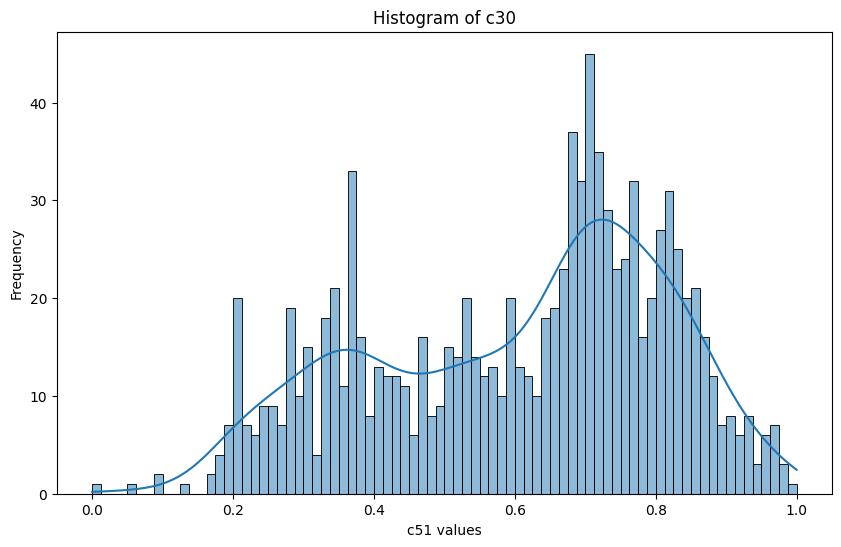

In [1246]:
column='c30'
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df[column], bins=80, kde=True)
plt.title(f'Histogram of {column}')
plt.xlabel('c51 values')
plt.ylabel('Frequency')
plt.show()

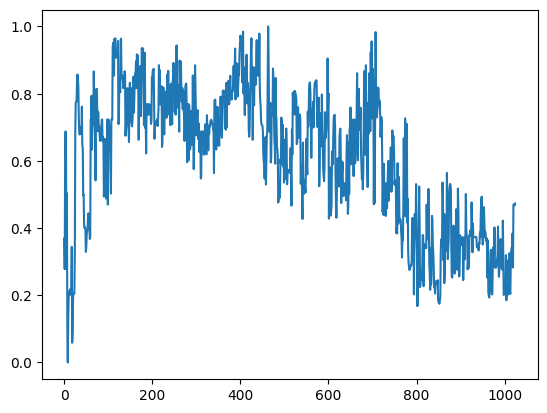

In [1247]:
plt.plot(normalized_df['c30'])

In [1248]:
# # Define the column names you want to work with
# # Get the column names of your cleaned DataFrame
# column_names = df_clean.columns.tolist()

# # Exclude 'c1' from the list of column names if it's present
# if 'c1' in column_names:
#     column_names.remove('c1')



# Create an empty DataFrame to store the results
# new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 100

# ... (previous code remains unchanged)


new_column_data = []  
for i in range(0, len(normalized_df['c30']), step_size):
    # Get the current 50 data points
    data_subset = normalized_df['c30'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.2 * iqr
    upper_bound = q3 + 0.2 * iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
# # Convert the new_column_data list to a Series
# new_column_series = pd.Series(new_column_data, name=column_name)
normalized_df['c30_1'] = new_column_data
    
# # Concatenate the new column to the new_df DataFrame
# new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


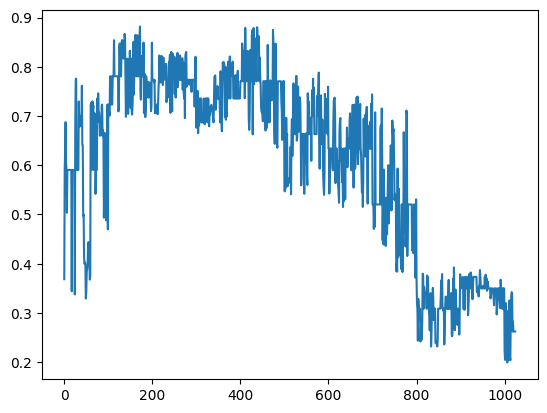

In [1249]:
plt.plot(normalized_df['c30_1'])

In [1250]:
# # Define the column names you want to work with
# # Get the column names of your cleaned DataFrame
# column_names = df_clean.columns.tolist()

# # Exclude 'c1' from the list of column names if it's present
# if 'c1' in column_names:
#     column_names.remove('c1')



# Create an empty DataFrame to store the results
# new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 50

# ... (previous code remains unchanged)


new_column_data = []  
for i in range(0, len(normalized_df['c30']), step_size):
    # Get the current 50 data points
    data_subset = normalized_df['c30'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5* iqr
    upper_bound = q3 + 0.5* iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
# # Convert the new_column_data list to a Series
# new_column_series = pd.Series(new_column_data, name=column_name)
normalized_df['c30_1'] = new_column_data
    
# # Concatenate the new column to the new_df DataFrame
# new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


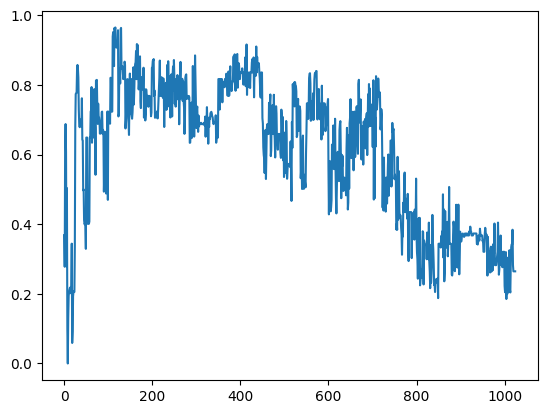

In [1251]:
plt.plot(normalized_df['c30_1'])

In [1252]:
# # Calculate the IQR for 'c30' column
# q1 = normalized_df['c30'].quantile(0.25)
# q3 = normalized_df['c30'].quantile(0.75)
# iqr = q3 - q1

# # Calculate lower and upper bounds for outliers
# lower_bound = q1 -  1.0* iqr
# upper_bound = q3 + 1.0* iqr

# # Replace outliers with the mean of the remaining data in 'c161' column
# normalized_df['c30'] = normalized_df['c30'].apply(lambda x: normalized_df['c30'][(normalized_df['c30'] >= lower_bound) & (normalized_df['c30'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


In [1253]:
# plt.plot(normalized_df['c30'])

# weighted mean

In [1254]:
# Assuming new_df is your DataFrame

# Function to calculate weighted mean
def weighted_mean(series):
    weights = range(1, len(series) + 1)
    return sum(series * weights) / sum(weights)

# Window size for rolling mean
window_size = 125

for column in normalized_df.columns:
    if(column!='c51' and column!='c52' and column!='c53' and column!='c54'):
        normalized_df[column] = normalized_df[column].rolling(window=window_size, min_periods=1).apply(weighted_mean, raw=True)

# Display the modified DataFrame
print(normalized_df)


       c2        c3        c4        c5        c6        c7        c8  \
0     0.0  0.821048  0.774432  0.797698  0.425286  0.340017  0.813924   
1     0.0  0.821048  0.774432  0.835596  0.292950  0.336216  0.813924   
2     0.0  0.821048  0.774432  0.775355  0.261878  0.235044  0.813924   
3     0.0  0.684262  0.774432  0.756665  0.255110  0.273858  0.813924   
4     0.0  0.675732  0.677234  0.761362  0.246823  0.291088  0.813924   
...   ...       ...       ...       ...       ...       ...       ...   
1020  0.0  0.581861  0.668062  0.600446  0.614164  0.271678  0.548323   
1021  0.0  0.581328  0.667276  0.597186  0.618901  0.270291  0.547951   
1022  0.0  0.581297  0.667237  0.594565  0.624323  0.269006  0.547478   
1023  0.0  0.581342  0.667298  0.593656  0.629758  0.267660  0.547061   
1024  0.0  0.581476  0.667499  0.590948  0.635026  0.266324  0.546752   

            c9       c10       c11  ...      c234      c235      c236  \
0     0.474407  0.800336  0.810486  ...  0.561245 

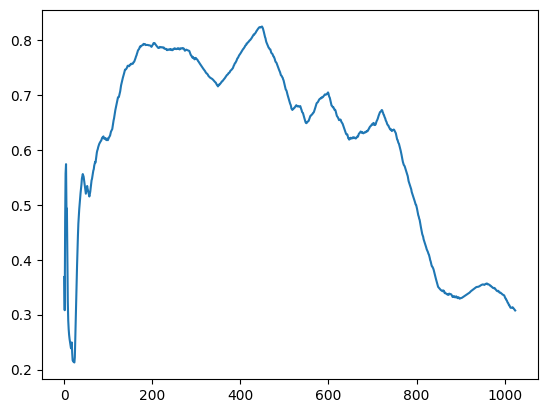

In [1255]:
plt.plot(normalized_df['c30_1'])

# c160

In [1256]:
# # Calculate the IQR for 'c30' column
# q1 = normalized_df['c160'].quantile(0.25)
# q3 = normalized_df['c160'].quantile(0.75)
# iqr = q3 - q1

# # Calculate lower and upper bounds for outliers
# lower_bound = q1 - 1.5* iqr
# upper_bound = q3 + 1.5* iqr

# # Replace outliers with the mean of the remaining data in 'c161' column
# normalized_df['c160'] = normalized_df['c160'].apply(lambda x: normalized_df['c160'][(normalized_df['c160'] >= lower_bound) & (normalized_df['c160'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


# c31

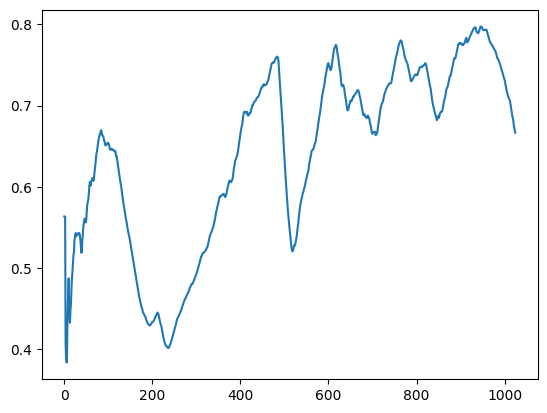

In [1257]:
plt.plot(normalized_df['c31'])

In [1258]:
for j in range(0,15):
    if(normalized_df['c31'][j]>0.4):
        normalized_df['c31'][j]=0.4


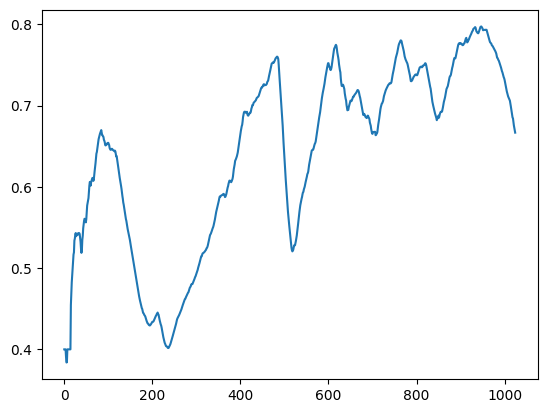

In [1259]:
plt.plot(normalized_df['c31'])

# c142

In [1260]:
# # Define the column names you want to work with
# # Get the column names of your cleaned DataFrame
# column_names = df_clean.columns.tolist()

# # Exclude 'c1' from the list of column names if it's present
# if 'c1' in column_names:
#     column_names.remove('c1')



# Create an empty DataFrame to store the results
# new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 15

# ... (previous code remains unchanged)


new_column_data = []  
for i in range(0, len(normalized_df['c142']), step_size):
    # Get the current 50 data points
    data_subset = normalized_df['c142'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5* iqr
    upper_bound = q3 + 0.5* iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
# # Convert the new_column_data list to a Series
# new_column_series = pd.Series(new_column_data, name=column_name)
normalized_df['c142_1'] = new_column_data
    
# # Concatenate the new column to the new_df DataFrame
# new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


C:\Users\ayush\AppData\Local\Temp\ipykernel_13820\1978354368.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_df['c142_1'] = new_column_data


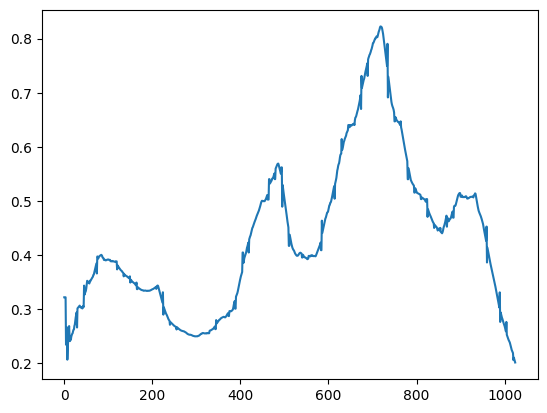

In [1261]:
plt.plot(normalized_df['c142_1'])

In [1262]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c33', 'c39', 'c139', 'c142_1', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y = normalized_df['c51']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y, X_with_const).fit()

# Get predictions and evaluate the model
predictions = statsmodel.predict(X_with_const)

# Calculate R-squared value
# r_squared = statsmodel.rsquared

# # Calculate p-value
# p_value = statsmodel.pvalues.iloc[1]  # p-value for the constant term, using .iloc[pos] to access by position

# # Calculate Mean Squared Error (optional, as you're using statsmodels)
# mse = ((predictions - y) ** 2).mean()

# print('R-squared:', r_squared)
# print('P-value:', p_value)
# print('Mean Squared Error:', mse)
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c51   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:02:27   Log-Likelihood:                 865.78
No. Observations:                1025   AIC:                            -1692.
Df Residuals:                    1005   BIC:                            -1593.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5590      0.361     -4.320      0.0

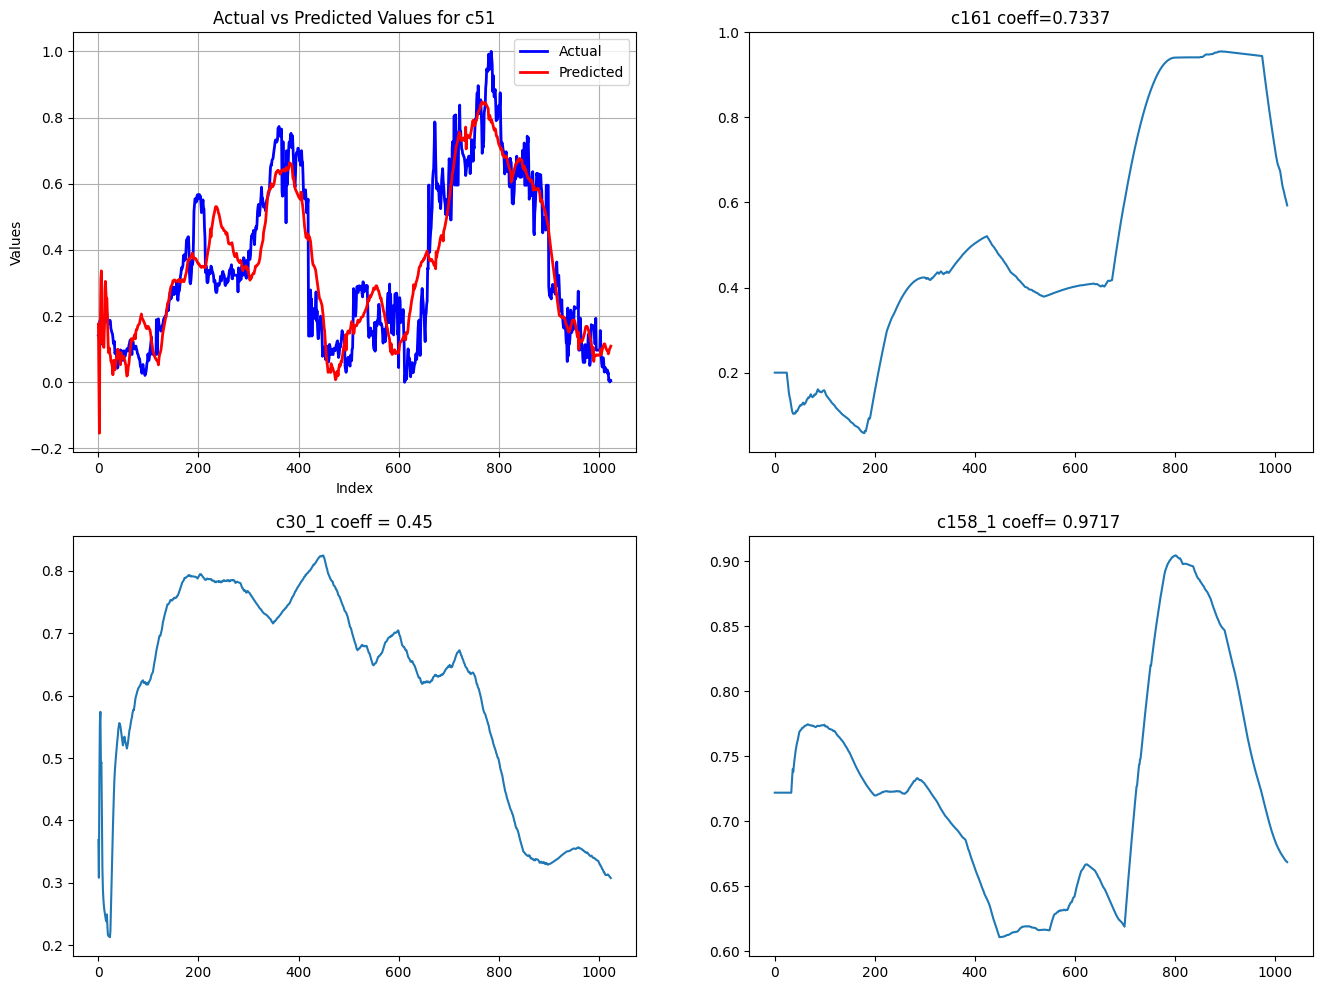

In [1263]:
import matplotlib.pyplot as plt

# Plot actual and predicted values for 'c51'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes[0,0].plot(normalized_df.index, y, color='blue', label='Actual', linewidth=2)
axes[0,0].plot(normalized_df.index, predictions, color='red', label='Predicted', linewidth=2)
axes[0,0].set_xlabel('Index')
axes[0,0].set_ylabel('Values')
axes[0,0].set_title('Actual vs Predicted Values for c51')
axes[0,0].legend()
axes[0,0].grid(True)
axes[0,1].plot(normalized_df.index, normalized_df['c161_1'],label='c161')
axes[0,1].set_title('c161 coeff=0.7337')
axes[1,0].plot(normalized_df.index, normalized_df['c30_1'],label='c30_1 of newdf')
axes[1,0].set_title('c30_1 coeff = 0.45')
axes[1,1].plot(normalized_df.index, normalized_df['c158_1'],label='c158_1')
axes[1,1].set_title(f'c158_1 coeff= 0.9717 ');

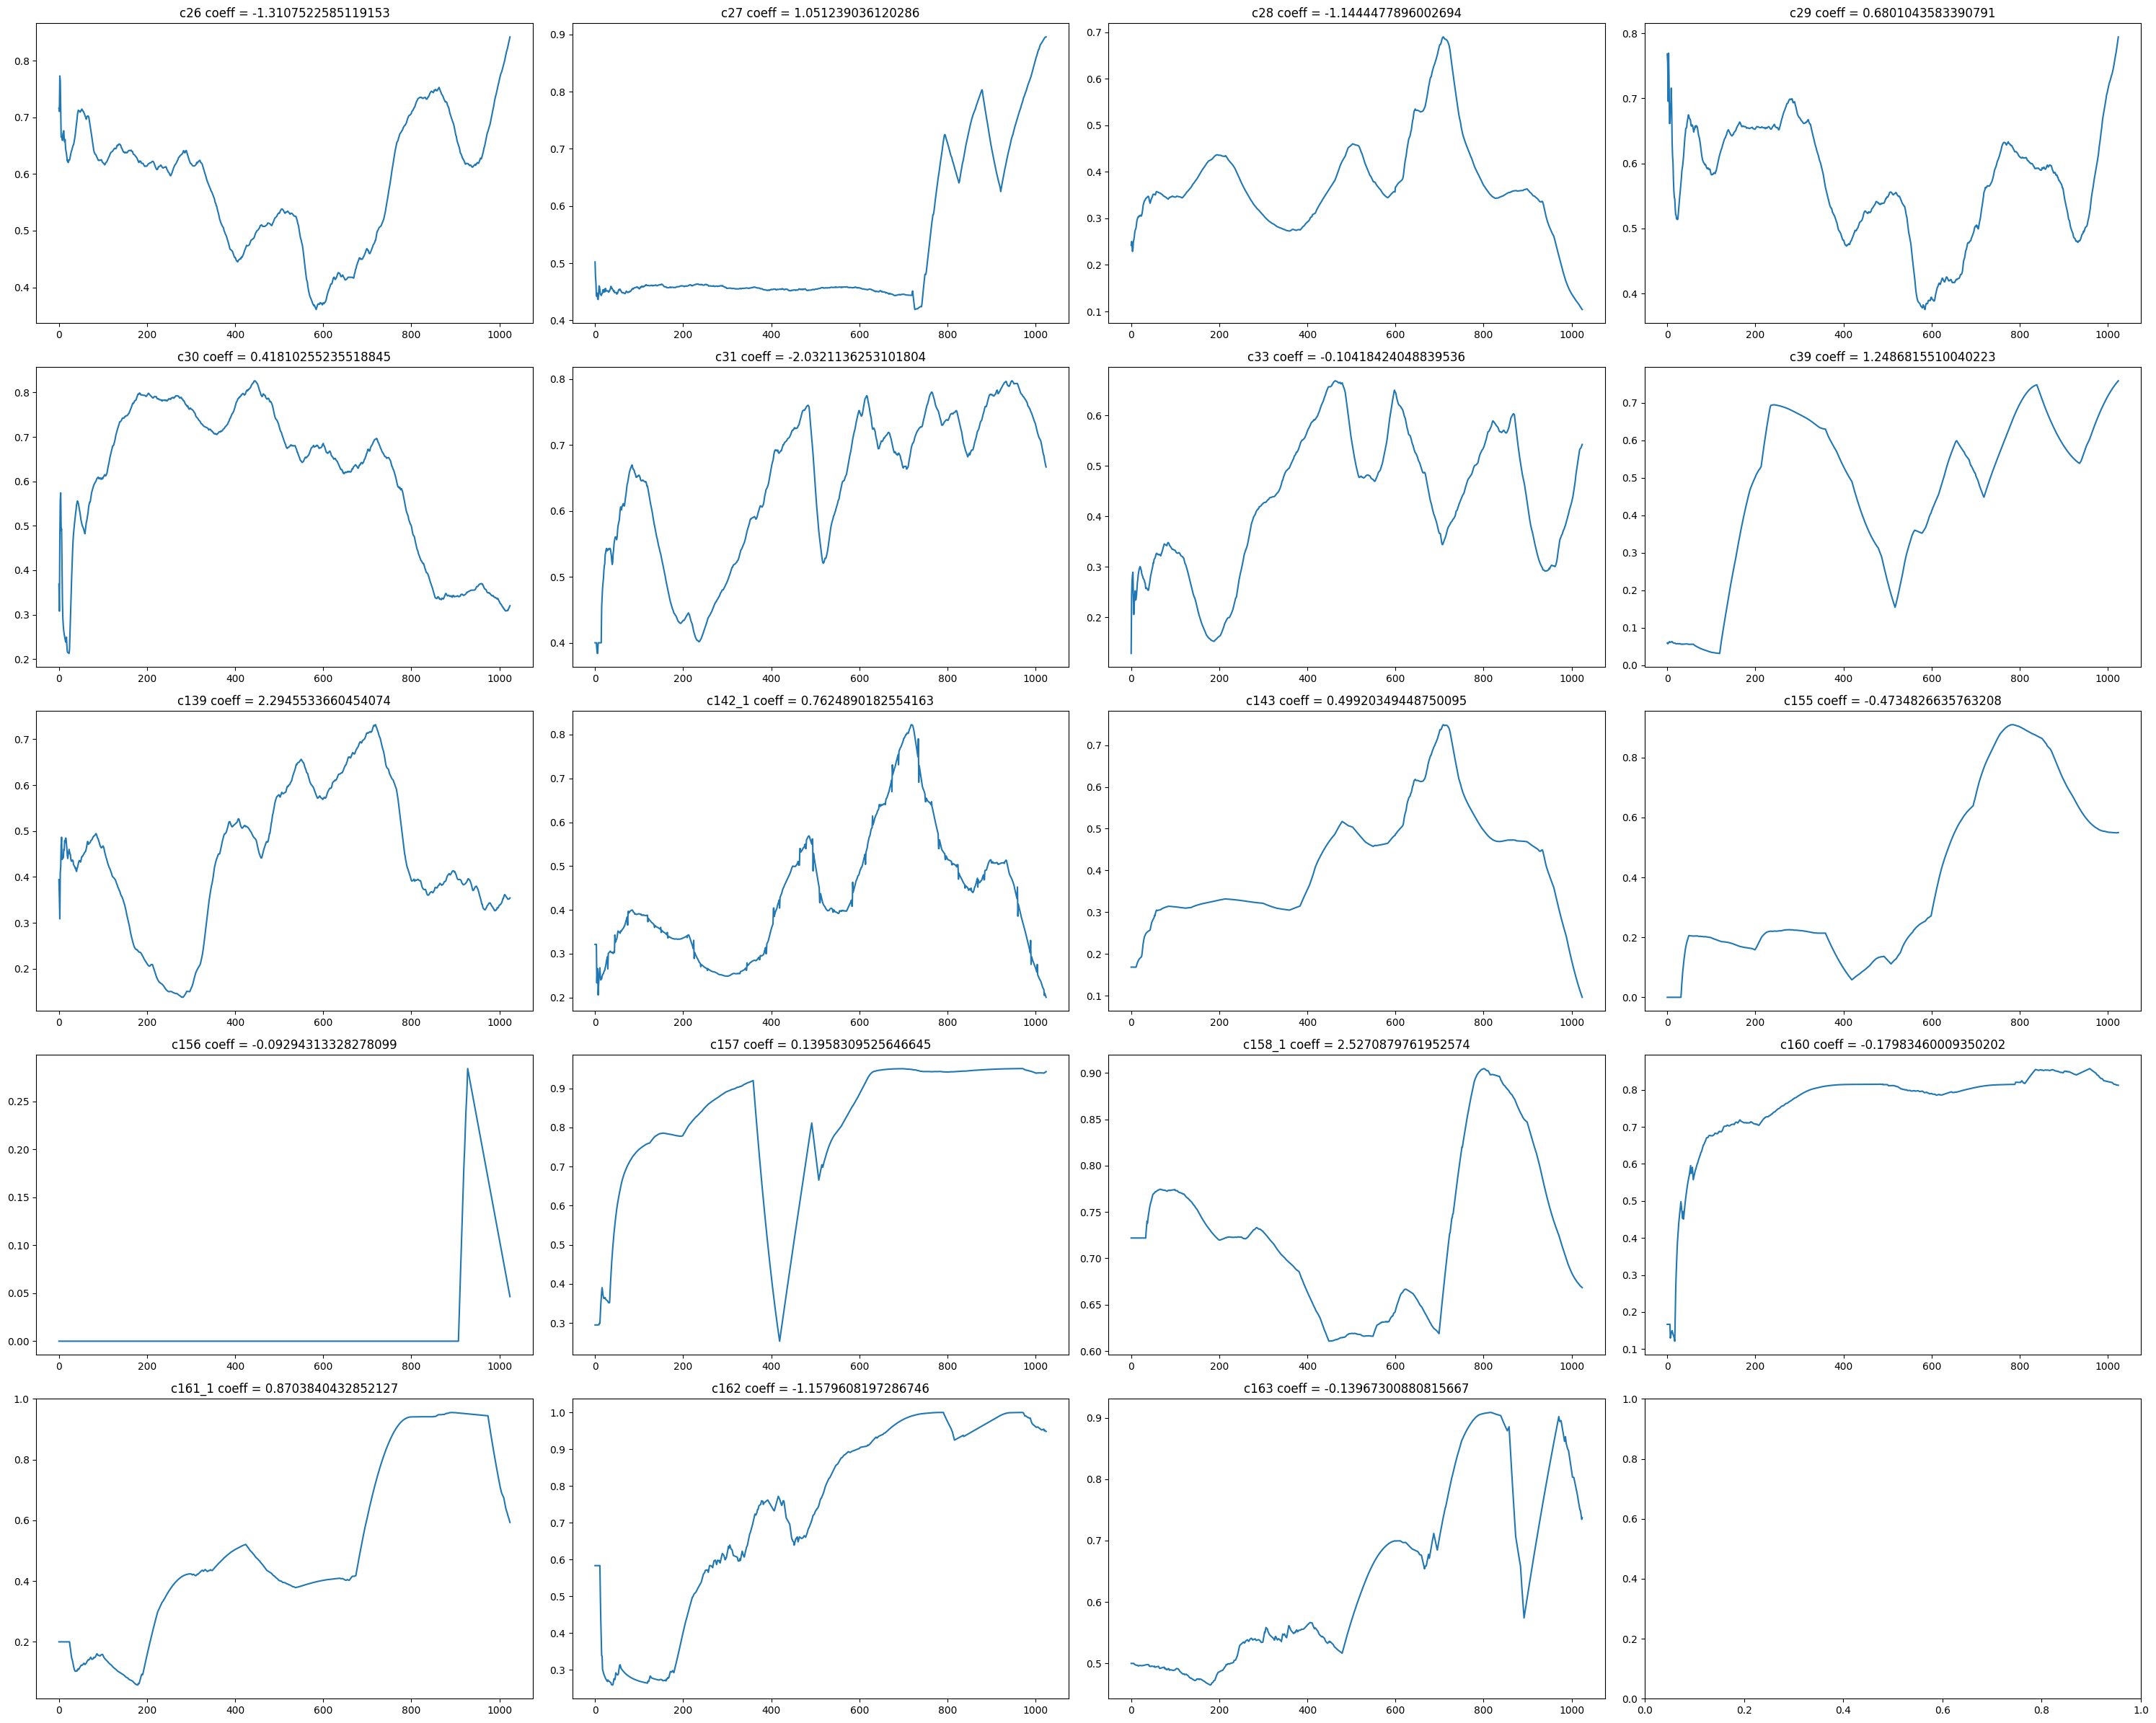

In [1264]:
selected_columns_2=['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c33', 'c39', 'c139', 'c142_1', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 24))

for i in range(5):
    for j in range(4):
        col_index = i * 4 + j
        if col_index < len(selected_columns_2):
            column_name = selected_columns_2[col_index]
            axes[i, j].plot(normalized_df[column_name])
            axes[i, j].set_title( f"{column_name} coeff = {statsmodel.params[column_name]}")

plt.tight_layout()
plt.show()

In [1265]:
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y = normalized_df['c51']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training R^2 score: {train_score:.4f}')
print(f'Testing R^2 score: {test_score:.4f}')

import statsmodels.api as sm

X_with_const = sm.add_constant(X)


model = sm.OLS(y, X_with_const)
results = model.fit()

Training R^2 score: 0.8304
Testing R^2 score: 0.8051


# c53 model


In [1266]:
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c53 = normalized_df['c53']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_c53, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training R^2 score: {train_score:.4f}')
print(f'Testing R^2 score: {test_score:.4f}')

import statsmodels.api as sm

X_with_const = sm.add_constant(X)


model = sm.OLS(y_c53, X_with_const)
results = model.fit()

Training R^2 score: 0.9495
Testing R^2 score: 0.9463


In [1267]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c33', 'c39', 'c139', 'c142_1', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c53 = normalized_df['c53']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c53, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c53 = statsmodel.predict(X_with_const)

# Calculate R-squared value
# r_squared = statsmodel.rsquared

# # Calculate p-value
# p_value = statsmodel.pvalues.iloc[1]  # p-value for the constant term, using .iloc[pos] to access by position

# # Calculate Mean Squared Error (optional, as you're using statsmodels)
# mse = ((predictions - y) ** 2).mean()

# print('R-squared:', r_squared)
# print('P-value:', p_value)
# print('Mean Squared Error:', mse)
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c53   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     985.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:02:29   Log-Likelihood:                 1428.4
No. Observations:                1025   AIC:                            -2817.
Df Residuals:                    1005   BIC:                            -2718.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9651      0.208     -4.629      0.0

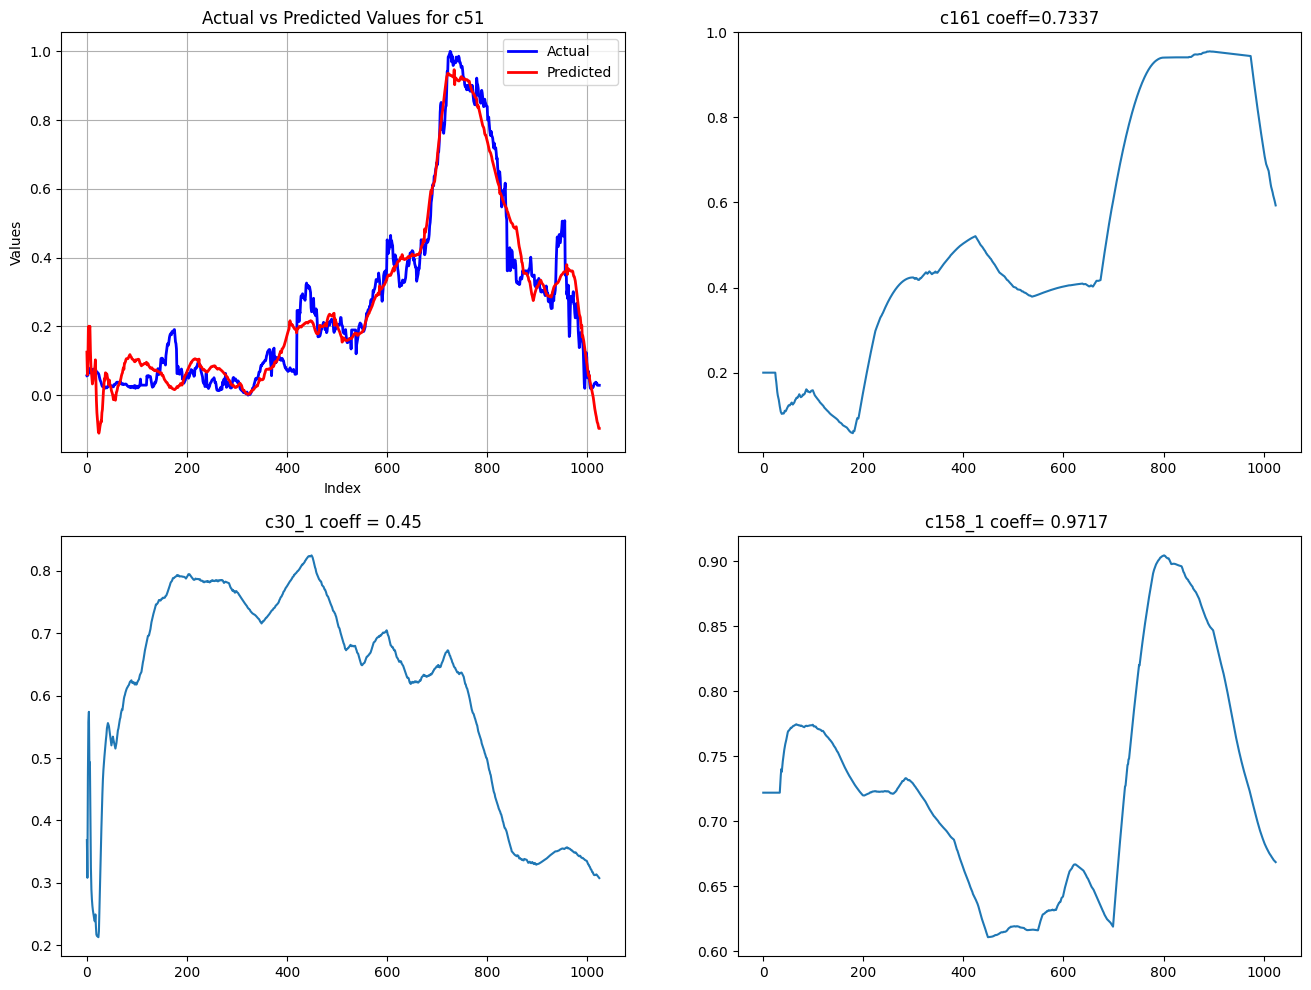

In [1268]:
import matplotlib.pyplot as plt

# Plot actual and predicted values for 'c51'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes[0,0].plot(normalized_df.index, y_c53, color='blue', label='Actual', linewidth=2)
axes[0,0].plot(normalized_df.index, predictions_c53, color='red', label='Predicted', linewidth=2)
axes[0,0].set_xlabel('Index')
axes[0,0].set_ylabel('Values')
axes[0,0].set_title('Actual vs Predicted Values for c51')
axes[0,0].legend()
axes[0,0].grid(True)
axes[0,1].plot(normalized_df.index, normalized_df['c161_1'],label='c161')
axes[0,1].set_title('c161 coeff=0.7337')
axes[1,0].plot(normalized_df.index, normalized_df['c30_1'],label='c30_1 of newdf')
axes[1,0].set_title('c30_1 coeff = 0.45')
axes[1,1].plot(normalized_df.index, normalized_df['c158_1'],label='c158_1')
axes[1,1].set_title(f'c158_1 coeff= 0.9717 ');

# c52 model

In [1269]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c33', 'c39', 'c139', 'c142_1', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c52 = normalized_df['c52']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y_c52)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c52, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c52 = statsmodel.predict(X_with_const)

# Calculate R-squared value
# r_squared = statsmodel.rsquared

# # Calculate p-value
# p_value = statsmodel.pvalues.iloc[1]  # p-value for the constant term, using .iloc[pos] to access by position

# # Calculate Mean Squared Error (optional, as you're using statsmodels)
# mse = ((predictions - y) ** 2).mean()

# print('R-squared:', r_squared)
# print('P-value:', p_value)
# print('Mean Squared Error:', mse)
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     313.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:02:30   Log-Likelihood:                 1003.1
No. Observations:                1025   AIC:                            -1966.
Df Residuals:                    1005   BIC:                            -1868.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7416      0.316     -5.517      0.0

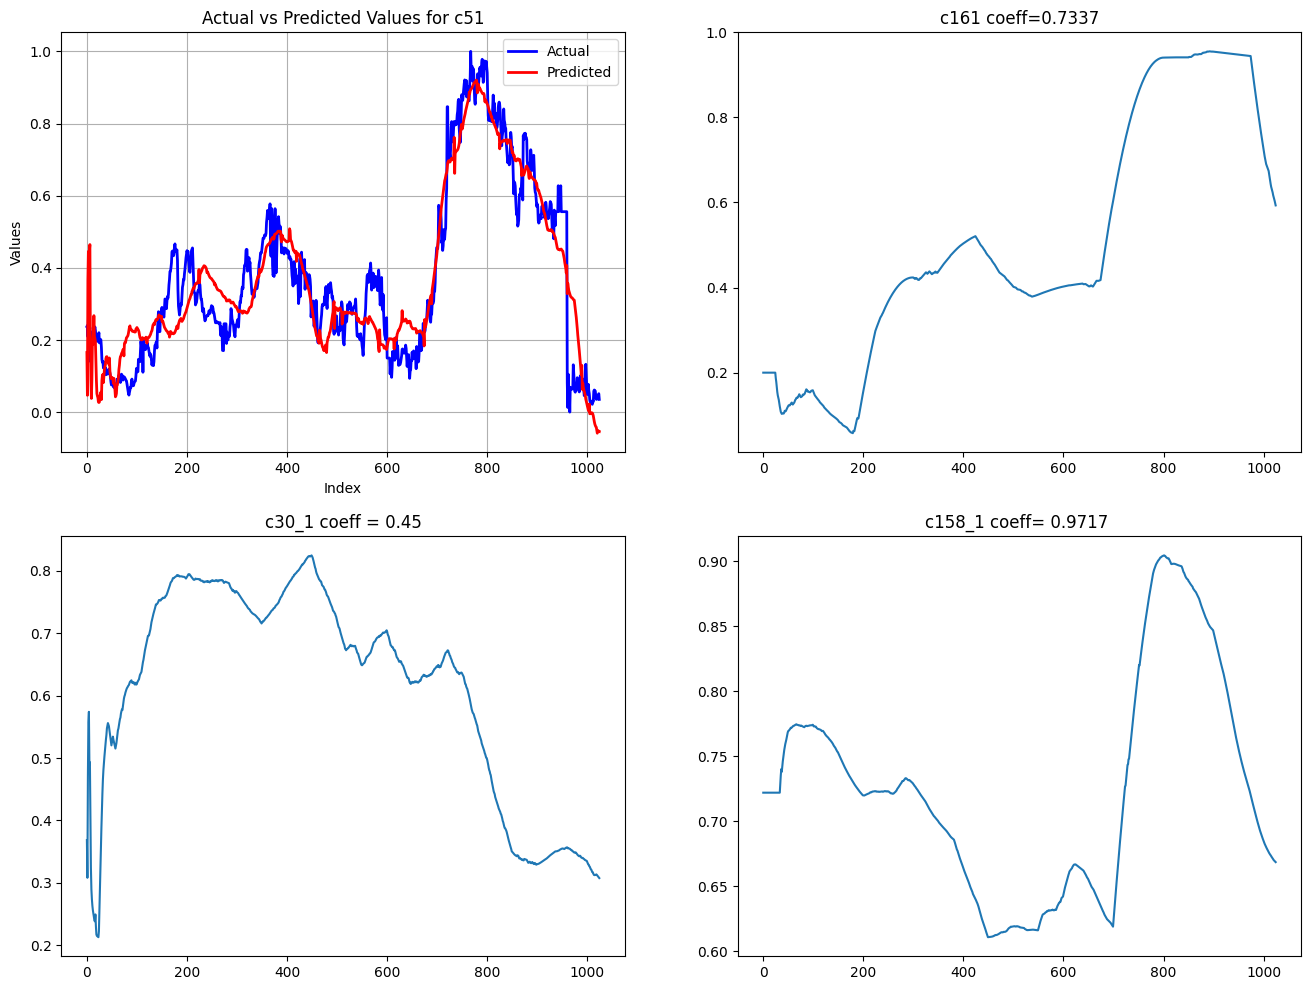

In [1270]:
import matplotlib.pyplot as plt

# Plot actual and predicted values for 'c51'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes[0,0].plot(normalized_df.index, y_c52, color='blue', label='Actual', linewidth=2)
axes[0,0].plot(normalized_df.index, predictions_c52, color='red', label='Predicted', linewidth=2)
axes[0,0].set_xlabel('Index')
axes[0,0].set_ylabel('Values')
axes[0,0].set_title('Actual vs Predicted Values for c51')
axes[0,0].legend()
axes[0,0].grid(True)
axes[0,1].plot(normalized_df.index, normalized_df['c161_1'],label='c161')
axes[0,1].set_title('c161 coeff=0.7337')
axes[1,0].plot(normalized_df.index, normalized_df['c30_1'],label='c30_1 of newdf')
axes[1,0].set_title('c30_1 coeff = 0.45')
axes[1,1].plot(normalized_df.index, normalized_df['c158_1'],label='c158_1')
axes[1,1].set_title(f'c158_1 coeff= 0.9717 ');

# c54

In [1271]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c33', 'c39', 'c139', 'c142_1', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c54 = normalized_df['c54']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y_c54)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c54, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c52 = statsmodel.predict(X_with_const)

# Calculate R-squared value
# r_squared = statsmodel.rsquared

# # Calculate p-value
# p_value = statsmodel.pvalues.iloc[1]  # p-value for the constant term, using .iloc[pos] to access by position

# # Calculate Mean Squared Error (optional, as you're using statsmodels)
# mse = ((predictions - y) ** 2).mean()

# print('R-squared:', r_squared)
# print('P-value:', p_value)
# print('Mean Squared Error:', mse)
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c54   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     636.3
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:02:30   Log-Likelihood:                 1252.7
No. Observations:                1025   AIC:                            -2465.
Df Residuals:                    1005   BIC:                            -2367.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3261      0.247     -1.318      0.1